In [1]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [2]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
# model parameters:
g = 9.8  # gravity in m s^{-2}
v_t = 30.0  # trim velocity in m s^{-1}
C_D = 1/40  # drag coefficinet --- or D/L if C_L=1
C_L = 1  # for convenience, use C_L = 1

### set initial conditions ###
v0 = v_t  # start at trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0  # horizotal position is arbitrary
y0 = 0  #initial altitude

In [4]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
    
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta)-C_D/C_L*g/v_t**2*v**2,
                       -g*cos(theta)/v+g/v_t**2*v,
                       v*cos(theta),
                       v*sin(theta)])

In [5]:
def euler_step(u, f, dt):
    """Returns the solution at next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [6]:
T = 100  # final time 
dt = 0.1  # time increment
N = int(T/dt) + 1  # number of time-steps
t = numpy.linspace(0, T, N)  # tiem discretization

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])  # fill 1st element with initial values

# time loop - Euler method
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [7]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

In [8]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y '-k', lw=2);

SyntaxError: invalid syntax (<ipython-input-8-07228e760727>, line 7)

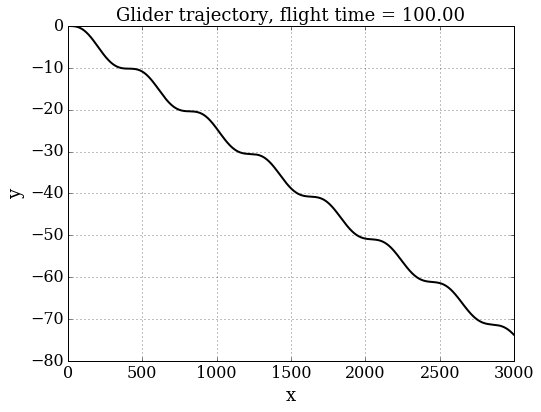

In [9]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, '-k', lw=2);